# Data collection

In [1]:
import requests
import json

def get_tweets(year):
    #  the truly excellent Trump Twitter Archive, which contains all of Trump’s tweets going back to 2009.
    url = ('http://www.trumptwitterarchive.com/data/realdonaldtrump/%s.json' %year)
    r = requests.get(url)
    print(str(year) + ' --> ' + 'done.')
    return r.json()

def save_tweets(years=range(2009,2019)):
        
        tweets = []
        for y in years:
            data = get_tweets(y)
            dl = len(data)
            
            i = 0
            while i < dl:
                tweets.append(data[i])
                i += 1
                
        return tweets
    
with open("trump_tweets_2009~2018.json", "w", encoding="utf-8") as outfile:
    json.dump(save_tweets(), outfile)
    print('ok')

2009 --> done.
2010 --> done.
2011 --> done.
2012 --> done.
2013 --> done.
2014 --> done.
2015 --> done.
2016 --> done.
2017 --> done.
2018 --> done.
ok


# Basic statistics & Visualizations

In [2]:
# make dataframe from JSON data
import pandas as pd
df = pd.read_json('trump_tweets_2009~2018.json')
df.shape

(33077, 8)

In [3]:
df.tail()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
33072,2018-01-10 04:23:58,60252,950946293077209088,NaN,False,13822,Twitter for iPhone,".@ICEgov HSI agents and ERO officers, on behal..."
33073,2018-01-10 03:48:26,51951,950937350003183616,NaN,False,11893,Twitter for iPhone,Thank you @GOPLeader Kevin McCarthy! Couldn’t ...
33074,2018-01-10 00:16:57,123413,950884128379035648,NaN,False,24552,Twitter for iPhone,"As I made very clear today, our country needs ..."
33075,2018-01-09 23:59:38,0,950879772644659200,NaN,True,11716,Twitter for iPhone,"RT @Scavino45: “Utilities cutting rates, cite ..."
33076,2018-01-09 23:07:09,82151,950866561153331200,NaN,False,19481,Twitter for iPhone,"Today, it was my great honor to sign a new Exe..."


In [4]:
# extract the mean of lenghts:
import numpy as np
mean = np.mean([len(i) for i in df.text])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 110.91%


In [5]:
# extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['favorite_count'])
rt_max  = np.max(df['retweet_count'])

fav = df[df.favorite_count == fav_max].index[0]
rt  = df[df.retweet_count == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(df['text'][fav]))
print("Number of likes: {}".format(fav_max))
print()
# Max RTs:
print("The tweet with more retweets is: \n{}".format(df['text'][rt]))
print("Number of retweets: {}".format(rt_max))

The tweet with more likes is: 
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before
Number of likes: 633253

The tweet with more retweets is: 
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
Number of retweets: 369530


In [6]:
# create time series for data:
tfav = pd.Series(data=df['favorite_count'].values, index=df['created_at'])
tret = pd.Series(data=df['retweet_count'].values, index=df['created_at'])

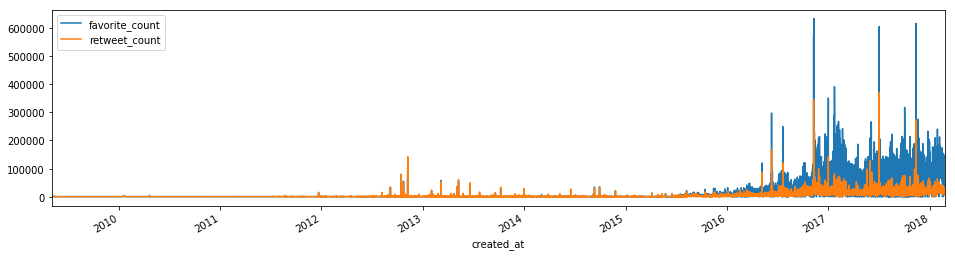

In [7]:
# Likes vs retweets visualization:
%matplotlib inline
tfav.plot(figsize=(16,4), label="favorite_count", legend=True)
tret.plot(figsize=(16,4), label="retweet_count", legend=True);

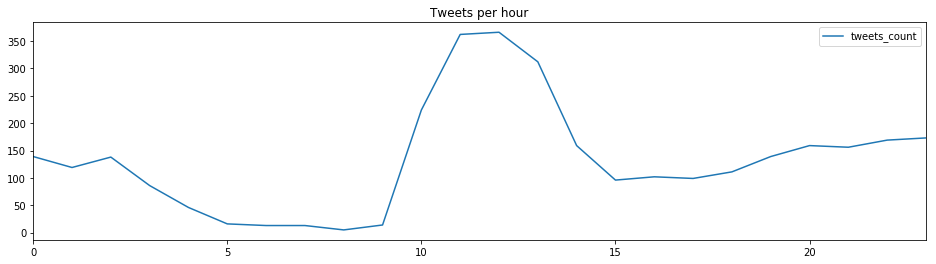

In [8]:
# what time of day the tweets occur
hours = list({t.hour for t in tfav.index})
temp = {}
for h in hours:
    c = 0
    for t in tfav['2016-11':'2018'].index:
        if t.hour == h:
            c += 1
    temp[h] = c
pd.Series(temp).plot(figsize=(16,4), label="tweets_count", legend=True, title='Tweets per hour');

In [9]:
# obtain all possible sources:
sources = list({source for source in df['source']})

# print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Media Studio
* Facebook
* Twitter Web Client
* Twitter for iPhone
* Twitter QandA
* Neatly For BlackBerry 10
* Periscope
* TweetDeck
* TwitLonger Beta
* Twitter for Websites
* Twitter Mirror for iPad
* Twitter for iPad
* Twitlonger
* Mobile Web (M5)
* Twitter for Android
* Twitter Ads
* Twitter for BlackBerry
* Vine - Make a Scene
* Instagram


In [10]:
sources_fq = {s:len(df[df.source == s]) for s in sources}
sources_fq

{'Facebook': 105,
 'Instagram': 133,
 'Media Studio': 128,
 'Mobile Web (M5)': 56,
 'Neatly For BlackBerry 10': 5,
 'Periscope': 7,
 'TweetDeck': 483,
 'TwitLonger Beta': 405,
 'Twitlonger': 23,
 'Twitter Ads': 97,
 'Twitter Mirror for iPad': 1,
 'Twitter QandA': 10,
 'Twitter Web Client': 12176,
 'Twitter for Android': 14545,
 'Twitter for BlackBerry': 97,
 'Twitter for Websites': 1,
 'Twitter for iPad': 51,
 'Twitter for iPhone': 4744,
 'Vine - Make a Scene': 10}

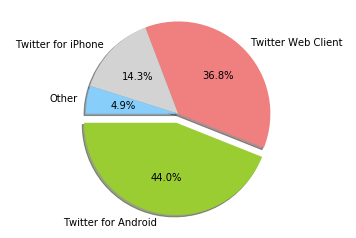

In [11]:
# Pie charts of sources
count = 0
ms_dict = {}
for x,y in sources_fq.items():
    if x not in ['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client']:
        count += y
    else: ms_dict[x] = y
ms_dict['Other'] = count

import matplotlib.pyplot as plt
labels=sorted(ms_dict.keys(), key=lambda x:len(x),reverse=True)
sizes=sorted(ms_dict.values(),reverse=True)
colors=['yellowgreen','lightcoral','lightgray','lightskyblue']
explode=0.1,0,0,0

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=180)
plt.axis('equal')
plt.show()

In [12]:
# tweets of different sources.
df_ad = df[df.source == 'Twitter for Android']
df_ip = df[df.source == 'Twitter for iPhone']
df_other = df[(df.source != 'Twitter for Android') & (df.source != 'Twitter for iPhone')]

In [13]:
def get_tweets_by_source(df_source):
    '''
    Function to know how many tweets are posted on different platforms each year.
    '''
    df_source.index = df_source.created_at
    result = {}
    for t in df_source.created_at:
        time = str(t)[:7]
        result[time] = len(df_source[time])

    return result

ad_tweets = get_tweets_by_source(df_ad)
ip_tweets = get_tweets_by_source(df_ip)
other_tweets = get_tweets_by_source(df_other)

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

dataset = {'x':list(ip_tweets.keys()),
           'y1':list(ip_tweets.values()),
           'y2':list(ad_tweets.values()),
           'y3':list(other_tweets.values())}

title="main source of @realDonaldTrump tweets over time"
data_g = []
tr_y1 = go.Bar(
    x = dataset['x'],
    y = dataset['y1'],
    name = 'iPhone',
    marker=dict(
    color='lightgray'
)
)
data_g.append(tr_y1)
tr_y2 = go.Bar(
    x = list(ad_tweets.keys()),
    y = dataset['y2'],
    name = 'Android',
    marker=dict(
    color='yellowgreen'
)
)
data_g.append(tr_y2)

tr_y3 = go.Bar(
    x = list(other_tweets.keys()),
    y = dataset['y3'],
    name = 'Other',
    marker=dict(
    color='pink'
)
)
data_g.append(tr_y3)

layout = go.Layout(title=title, xaxis={'title':'Time'}, yaxis={'title':'Number of tweets'})
fig = go.Figure(data=data_g, layout=layout)
py.iplot(fig, filename=title)

![title](img/1.png)

# Data cleaning

In [15]:
# use TweetTokenizer to tokenise a Tweet Text
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['text']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

668488
['from', 'donald', 'trump', ':', 'wishing', 'everyone', 'a', 'wonderful', 'holiday', '&', 'a', 'happy', ',', 'healthy', ',', 'prosperous', 'new', 'year', '.', 'let']


In [16]:
# remove stop words and other noise(links and special characters) to get clear tokens
from nltk.corpus import stopwords
import string

punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

264476
['donald', 'trump', 'wishing', 'everyone', 'wonderful', 'holiday', 'happy', 'healthy', 'prosperous', 'new', 'year', 'let', 'think', 'like', 'champions', 'trump', 'international', 'tower', 'chicago', 'ranked']


# Top 10 

In [17]:
from nltk import FreqDist

def get_top10_of(i, n=10):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [18]:
# top 10 mentions
get_top10_of('@')

[('@realdonaldtrump', 8593),
 ('@barackobama', 693),
 ('@foxnews', 461),
 ('@foxandfriends', 436),
 ('@apprenticenbc', 401),
 ('@mittromney', 287),
 ('@cnn', 274),
 ('@ivankatrump', 221),
 ('@megynkelly', 155),
 ('@seanhannity', 149)]

In [19]:
# top 10 hashtags
get_top10_of('#')

[('#trump2016', 868),
 ('#makeamericagreatagain', 518),
 ('#celebapprentice', 221),
 ('#', 176),
 ('#celebrityapprentice', 149),
 ('#maga', 141),
 ('#trump', 113),
 ('#americafirst', 94),
 ('#draintheswamp', 77),
 ('#trumpforpresident', 76)]

In [20]:
get_top10_of('obama')

[('obama', 1227),
 ('obamacare', 397),
 ("obama's", 115),
 ('obamas', 5),
 ("obamacare's", 4),
 ('obama.the', 2),
 ('obamacare.via', 2),
 ('obamatrade', 2),
 ('obamacare.washington', 1),
 ('obamacare.hopefully', 1)]

# Marks of different sources

In [21]:
df_temp = df[~df.is_retweet].copy() # only non-RTs
df_temp.index = df_temp.created_at
df_temp = df_temp['2015-06':'2018'] # after Trump formally announced his candidacy 

def get_marks_on_source(source):
    '''
    Function to gather the number of tweets marks on different sources
    '''
    results = {}
    link_counter = 0
    hashtag_counter = 0
    quote_counter = 0
    
    for t in df_temp[df_temp.source == source].text:
        if t.startswith('"'):
            quote_counter += 1
        for i in t.split(' '):
            if i.startswith('https'):
                link_counter += 1
                break
        for i in t.split(' '):
            if i.startswith('#'):
                hashtag_counter += 1
                break

        results['links'] = link_counter
        results['quotes'] = quote_counter
        results['hashtags'] = hashtag_counter
        
    return results

ad_case = get_marks_on_source('Twitter for Android')
ip_case = get_marks_on_source('Twitter for iPhone')

In [22]:
print(ad_case)
print(ip_case)

{'links': 384, 'quotes': 2399, 'hashtags': 684}
{'links': 1743, 'quotes': 73, 'hashtags': 1284}


In [23]:
import plotly.plotly as py
import plotly.graph_objs as go

dataset = {'x':['links','quotes','hashtags'],
           'y1':list(ad_case.values()),
           'y2':list(ip_case.values()),}

title='''whether tweets start with a quotation mark (") or have links ('https') and hashtags('#')'''
data_g = []
tr_y1 = go.Bar(
    x = dataset['x'],
    y = dataset['y1'],
    name = 'Android',
    marker=dict(
    color='yellowgreen'
)
)
data_g.append(tr_y1)
tr_y2 = go.Bar(
    x = dataset['x'],
    y = dataset['y2'],
    name = 'iPhone',
    marker=dict(
    color='lightgray'
)
)
data_g.append(tr_y2)

layout = go.Layout(title=title, xaxis={'title':'Marks'}, yaxis={'title':'Number of tweets'})
fig = go.Figure(data=data_g, layout=layout)
py.iplot(fig, filename=title)

![title](img/2.png)

# Wordcloud

In [24]:
# use the tokens of original tweets to draw a wordcloud
df_original = df[~df.is_retweet].copy()
df_original.index = df_original.created_at

tokens_original = clear_tokens(tokenizer_tweets(df_original['2015-6':'2018']))
print(len(tokens_original))

94213


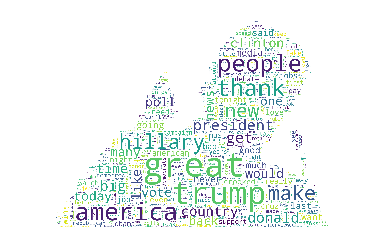

In [25]:
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from scipy.misc import imread

bg_pic = imread('img/trump.jpg')
wc = WordCloud(background_color="white",
                      stopwords=stop,
                      mask=bg_pic,
                      scale=3,
                      max_words=2000,
                      max_font_size=100, 
                      random_state=42
                     ).generate_from_frequencies(FreqDist(tokens_original))

image_colors = ImageColorGenerator(bg_pic)

plt.imshow(wc)
plt.axis("off")
plt.show(wc.recolor(color_func=image_colors))

wc.to_file('img/trump_tweets_wordcloud.png')

# Trump's tweets about Hillary Clinton 

In [26]:
# create a dict of monthly tweets
created_month = sorted({str(t)[:7] for t in df_original['created_at']})
df_original['created_month'] = [str(t)[:7] for t in df_original['created_at']]
monthly_tweets = {}

for m in created_month:
    tweets = [t.lower() for t in df_original[(df_original.created_month == m)].text]
    monthly_tweets[m] = tweets

In [27]:
def talk_about(name):
    '''
    Function to gather monthly tweets & return term frequency of the name
    '''
    name = name.lower()
    name_mentions_frequency = {}
    
    for m in monthly_tweets.keys():
        count = 0
        for t in monthly_tweets[m]:
            for i in t.split(' '):
                if i == name:
                    count += 1
                    
        name_mentions_frequency[m] = ('%.2f%%' % (((count)/(len(monthly_tweets[m])))*100))
    
    return name_mentions_frequency

hillary_mentions_fq = talk_about('Hillary')

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go

data_g = []
tr_x = go.Scatter(
    x = list(hillary_mentions_fq.keys()),
    y = list(hillary_mentions_fq.values()),
    name = 'hillary',
    marker=dict(
    color='red'
)
)
data_g.append(tr_x)


title = "Trump's tweets about Hillary Clinton"
layout = go.Layout(title=title, xaxis={'title':'Time'}, yaxis={'title':"% of tweets"})
fig = go.Figure(data=data_g, layout=layout)
py.iplot(fig, filename=title)

![title](img/3.png)

# Bigram Frequency

In [29]:
import nltk
from nltk.collocations import *

#Create bigrams
bgs = nltk.bigrams(tokens_original)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
bigram_fq = fdist.most_common()
bigram_fq_25 = {k:v for k,v in dict(bigram_fq[:25]).items()}

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go
c1 = 'rgba(204,204,204,1)'
c2 = 'rgba(222,45,38,0.8)'
trace0 = go.Bar(
    orientation="h",
    x=list(bigram_fq_25.values()),
    y=[str(i) for i in list(bigram_fq_25.keys())],
    marker=dict(
        color=[c1]*3+[c2]*3+[c1]*19),
)

data = [trace0]
title = "Bigram Frequency"
layout = go.Layout(
    title=title,
    height=700,
    margin={
      "pad": 4,
      "l": 200,
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename=title)

![title](img/4.png)

# Sentiment analysis

In [31]:
# textblob will allow us to do sentiment analysis in a very simple way
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [32]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.text]

In [33]:
df.tail()

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,sentiment
33072,2018-01-10 04:23:58,60252,950946293077209088,NaN,False,13822,Twitter for iPhone,".@ICEgov HSI agents and ERO officers, on behal...",Positive
33073,2018-01-10 03:48:26,51951,950937350003183616,NaN,False,11893,Twitter for iPhone,Thank you @GOPLeader Kevin McCarthy! Couldn’t ...,Positive
33074,2018-01-10 00:16:57,123413,950884128379035648,NaN,False,24552,Twitter for iPhone,"As I made very clear today, our country needs ...",Positive
33075,2018-01-09 23:59:38,0,950879772644659200,NaN,True,11716,Twitter for iPhone,"RT @Scavino45: “Utilities cutting rates, cite ...",Negative
33076,2018-01-09 23:07:09,82151,950866561153331200,NaN,False,19481,Twitter for iPhone,"Today, it was my great honor to sign a new Exe...",Positive


In [34]:
# positive tweets sample
for t in df[df['sentiment'] == 'Positive'].text[:5]:
    print(t + '\n')

From Donald Trump: Wishing everyone a wonderful holiday & a happy, healthy, prosperous New Year. Let’s think like champions in 2010!

Wishing you and yours a very Happy and Bountiful Thanksgiving!

Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc

--Work has begun, ahead of schedule, to build the greatest golf course in history: Trump International – Scotland.

--From Donald Trump: "Ivanka and Jared’s wedding was spectacular, and they make a beautiful couple. I’m a very proud father."



In [35]:
# negative tweets sample
for t in df[df['sentiment'] == 'Negative'].text[-5:]:
    print(t + '\n')

“House votes on controversial FISA ACT today.” This is the act that may have been used, with the help of the discredited and phony Dossier, to so badly surveil and abuse the Trump Campaign by the previous administration and others?

Disproven and paid for by Democrats “Dossier used to spy on Trump Campaign. Did FBI use Intel tool to influence the Election?” @foxandfriends  Did Dems or Clinton also pay Russians? Where are hidden and smashed DNC servers? Where are Crooked Hillary Emails?  What a mess!

The fact that Sneaky Dianne Feinstein, who has on numerous occasions stated that collusion between Trump/Russia has not been found, would release testimony in such an underhanded and possibly illegal way, totally without authorization, is a disgrace. Must have tough Primary!

It just shows everyone how broken and unfair our Court System is when the opposing side in a case (such as DACA) always runs to the 9th Circuit and almost always wins before being reversed by higher courts.

RT @Scavi

In [36]:
# print percentages:
pos_tweets = df[(~df.is_retweet) & (df.sentiment == 'Positive')] 
neu_tweets = df[(~df.is_retweet) & (df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(~df.is_retweet) & (df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df[(~df.is_retweet)])))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df[(~df.is_retweet)])))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df[(~df.is_retweet)])))

Percentage of positive tweets: 56.09%
Percentage of neutral tweets: 27.21%
Percentage of negative tweets: 16.70%


In [37]:
# draw a positive wordcloud and a negative wordcloud
pos_tokens = [t for t in tokens_original if get_tweet_sentiment(t) == 'Positive']
neg_tokens = [t for t in tokens_original if get_tweet_sentiment(t) == 'Negative']

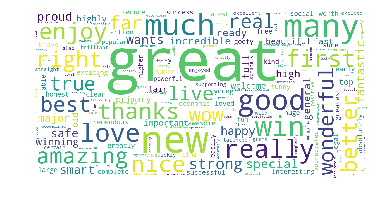

In [38]:
wc = WordCloud(background_color="white",
                      stopwords=stop,
                      scale=3,
                      max_words=2000,
                      max_font_size=70, 
                      random_state=200
                     ).generate_from_frequencies(FreqDist(pos_tokens))


plt.imshow(wc)
plt.axis("off")
plt.show(wc)

wc.to_file('img/trump_tweets_positive_wordcloud.png')

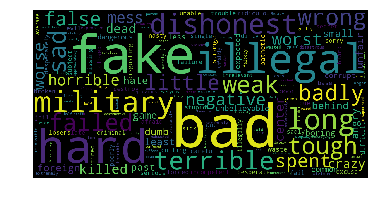

In [39]:
wc = WordCloud(background_color="black",
                      stopwords=stop,
                      scale=3,
                      max_words=2000,
                      max_font_size=70, 
                      random_state=100
                     ).generate_from_frequencies(FreqDist(neg_tokens))


plt.imshow(wc)
plt.axis("off")
plt.show(wc)

wc.to_file('img/trump_tweets_negative_wordcloud.png')

# Which source is more negative? andriod or iPhone ?

In [40]:
df_original['sentiment'] = np.array(df[~(df.is_retweet)].sentiment)
print('Android --> '+str(len(df_original[(df_original.source == 'Twitter for Android') & (df_original.sentiment == 'Negative')])))
print('iPhone --> '+str(len(df_original[(df_original.source == 'Twitter for iPhone') & (df_original.sentiment == 'Negative')])))

Android --> 2522
iPhone --> 784


In [41]:
def get_sentiment_over_time(source,sentiment):
    
    if source in ['Twitter for Android', 'Twitter for iPhone']:
        source_sentiment = df_original[(df_original.source == source) & (df_original.sentiment == sentiment)]
    else:
        source_sentiment = df_original[(df_original.source != 'Twitter for Android') & 
                               (df_original.source != 'Twitter for iPhone') &
                               (df_original.sentiment == sentiment)]
        
    created_month = monthly_tweets.keys()
    results = {m:len(source_sentiment[m]) for m in created_month if len(source_sentiment[m]) != 0}
    
    return results

ad_neg = get_sentiment_over_time('Twitter for Android', 'Negative')
ip_neg = get_sentiment_over_time('Twitter for iPhone', 'Negative')
other_neg = get_sentiment_over_time('Other', 'Negative')

In [42]:
dataset = {'x':list(other_neg.keys()),
           'Android':list(ad_neg.values()),
           'iPhone':list(ip_neg.values()),
           'Other':list(other_neg.values())
          }

data_g = []
tr_x = go.Scatter(
    x = list(ip_neg.keys()),
    y = dataset['iPhone'],
    name = 'iPhone',
    marker=dict(
    color='silver'
)
)
data_g.append(tr_x)
tr_z = go.Scatter(
    x = list(ad_neg.keys()),
    y = dataset['Android'],
    name = 'Android',
    marker=dict(
    color='yellowgreen'
)
)
data_g.append(tr_z)
tr_a = go.Scatter(
    x = dataset['x'],
    y = dataset['Other'],
    name = 'Other',
    marker=dict(
    color='pink'
)
)
data_g.append(tr_a)

title = 'Negative tweets on different sources'
layout = go.Layout(title=title, xaxis={'title':'Time'}, yaxis={'title':"Number of tweets"})
fig = go.Figure(data=data_g, layout=layout)
py.iplot(fig, filename=title)

![title](img/5.png)